# Data set

For these examples, we'll be using the meat data set which has been made available to us from the U.S. Dept. of Agriculture. It contains metrics on livestock, dairy, and poultry outlook and production.

You can find the data set in either the ggplot package or the pandasql package, both of which are installed via pip.

$ pip install -U ggplot

$ pip install -U pandasql

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *
%matplotlib inline  

meat = meat.dropna(thresh=800, axis=1) # drop columns that have fewer than 800 observations
ts = meat.set_index(['date'])

In [55]:
ts.head(10)

,beef,veal,pork,lamb_and_mutton
date,,,,
1944-01-01,751,85,1280,89
1944-02-01,713,77,1169,72
1944-03-01,741,90,1128,75
1944-04-01,650,89,978,66
1944-05-01,681,106,1029,78
1944-06-01,658,125,962,79
1944-07-01,662,142,796,82
1944-08-01,787,175,748,87
1944-09-01,774,182,678,91


In [56]:
## Working-with-dates-and-times-with-pandas">Working with dates and times with pandas
#pandas has some excellent out of the box functionality for aggregating date and time based data.

In [57]:
ts.groupby(ts.index.year).sum().head(10)

,beef,veal,pork,lamb_and_mutton
1944,8801,1629,11502,1001
1945,9936,1552,8843,1030
1946,9010,1329,9220,946
1947,10096,1493,8811,779
1948,8766,1323,8486,728
1949,9142,1240,8875,587
1950,9248,1137,9397,581
1951,8549,972,10190,508
1952,9337,1080,10321,635
1953,12055,1451,8971,715


In [58]:
the1940s = ts.groupby(ts.index.year).sum().ix[1940:1949] #:'1949']  #.ix['1940-01-01':'1949-12-31']
the1940s

,beef,veal,pork,lamb_and_mutton
1944,8801,1629,11502,1001
1945,9936,1552,8843,1030
1946,9010,1329,9220,946
1947,10096,1493,8811,779
1948,8766,1323,8486,728
1949,9142,1240,8875,587


In [59]:
def floor_decade(date_value):
    "Takes a date. Returns the decade."
    return (date_value.year // 10) * 10

pd.to_datetime('2013-10-09')

Timestamp('2013-10-09 00:00:00')

In [60]:
floor_decade(_)

2010

In [61]:
ts.groupby(floor_decade).sum()

,beef,veal,pork,lamb_and_mutton
1940,55751.0,8566.0,55737.0,5071.0
1950,119161.0,12693.0,98450.0,6724.0
1960,177754.0,8577.0,116587.0,6873.0
1970,228947.0,5713.0,132539.0,4256.0
1980,230100.0,4278.0,150528.0,3394.0
1990,243579.0,2938.0,173519.0,2986.0
2000,260540.7,1685.3,208211.3,1964.7
2010,76391.5,371.9,66491.2,455.6


In [62]:
the1940s.sum().reset_index(name='meat sums in the 1940s')

,index,meat sums in the 1940s
0,beef,55751
1,veal,8566
2,pork,55737
3,lamb_and_mutton,5071


In [63]:
by_decade = ts.groupby(floor_decade).sum()

by_decade.index.name = 'year'


by_decade = by_decade.reset_index()

#print by_decade

#ggplot(by_decade, aes('year', weight='beef'))  + \
#    geom_bar() #+ \
#    scale_y_continuous(labels='comma') + \
#    ggtitle('Head of Cattle Slaughtered by Decade')   

In [64]:
by_decade_long = pd.melt(by_decade, id_vars="year")

ggplot(aes(x='year', weight='value', colour='variable'), data=by_decade_long) + \
geom_bar() + \
ggtitle("Meat Production by Decade")

TypeError: pivot_table() got an unexpected keyword argument 'rows'

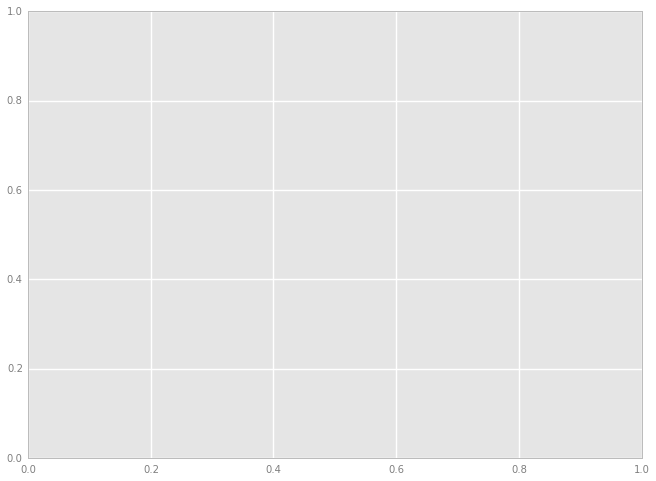

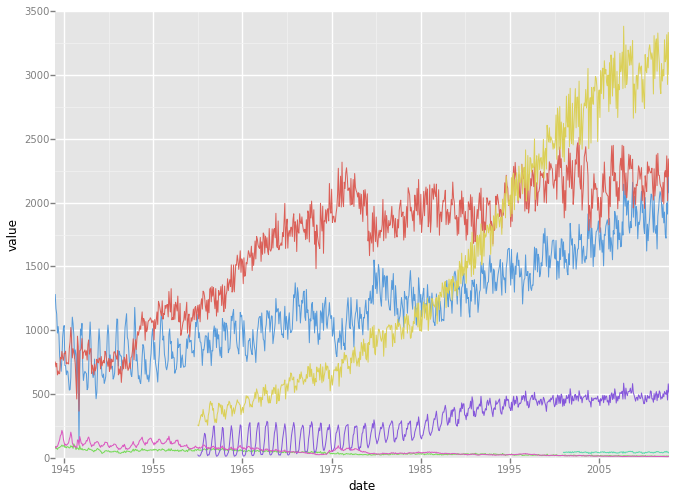

<ggplot: (290431577)>

In [65]:
from ggplot import meat
meat_lng = pd.melt(meat, id_vars=['date'])
ggplot(aes(x='date', y='value', colour='variable'), data=meat_lng) + geom_line()

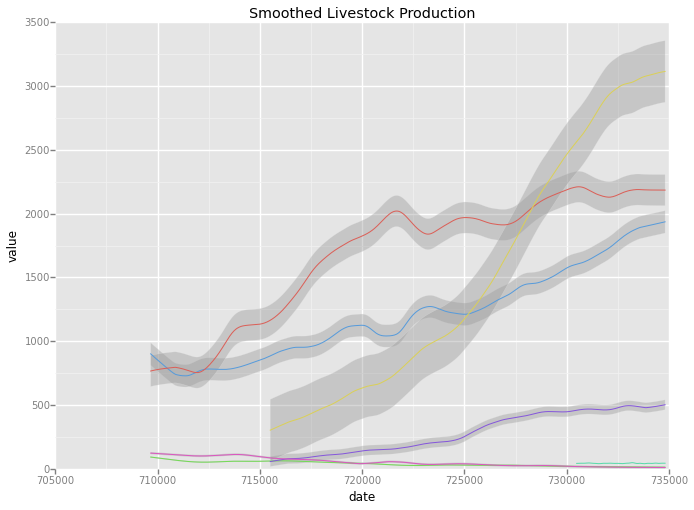

<ggplot: (290777749)>

In [66]:
ggplot(aes(x='date', y='value', colour='variable'), data=meat_lng) + \
    stat_smooth(span=0.10) + \
    ggtitle("Smoothed Livestock Production")

In [ ]:
freqency difference


